In [61]:
from sklearn.manifold import MDS
import scipy.spatial.distance as ssd
from Bio import Align, SeqIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
def pairmsa(nuc1, nuc2):

    if nuc1 == nuc2:
        return(0)

    else:
        seq1 = record[nuc1.item()].seq
        seq2 = record[nuc2.item()].seq

        aligner = Align.PairwiseAligner()
        aligner.mode = 'global'

        alignment = aligner.align(seq1, seq2)[0]
        score = alignment.score/len(str(alignment).split('\n')[0])

        return(score)

In [130]:
record = SeqIO.index(
    'C.fasta',
    'fasta',
    key_function=lambda entry: entry.split('|')[0]
)
accessions = list(record.keys())

In [118]:
main = np.array(accessions)
main = main.reshape(-1, 1)

In [126]:
blobs, _ = make_blobs(n_samples=23, n_features=2)
dissimilarities = ssd.cdist(blobs, blobs, metric='euclidean')
data2 = pd.DataFrame(blobs, columns=['x', 'y'], index=accessions)

In [128]:
embedding = MDS(n_components=2, dissimilarity='precomputed')
transformed = embedding.fit_transform(dissimilarities)
data = pd.DataFrame(transformed, columns=['x', 'y'], index=accessions)

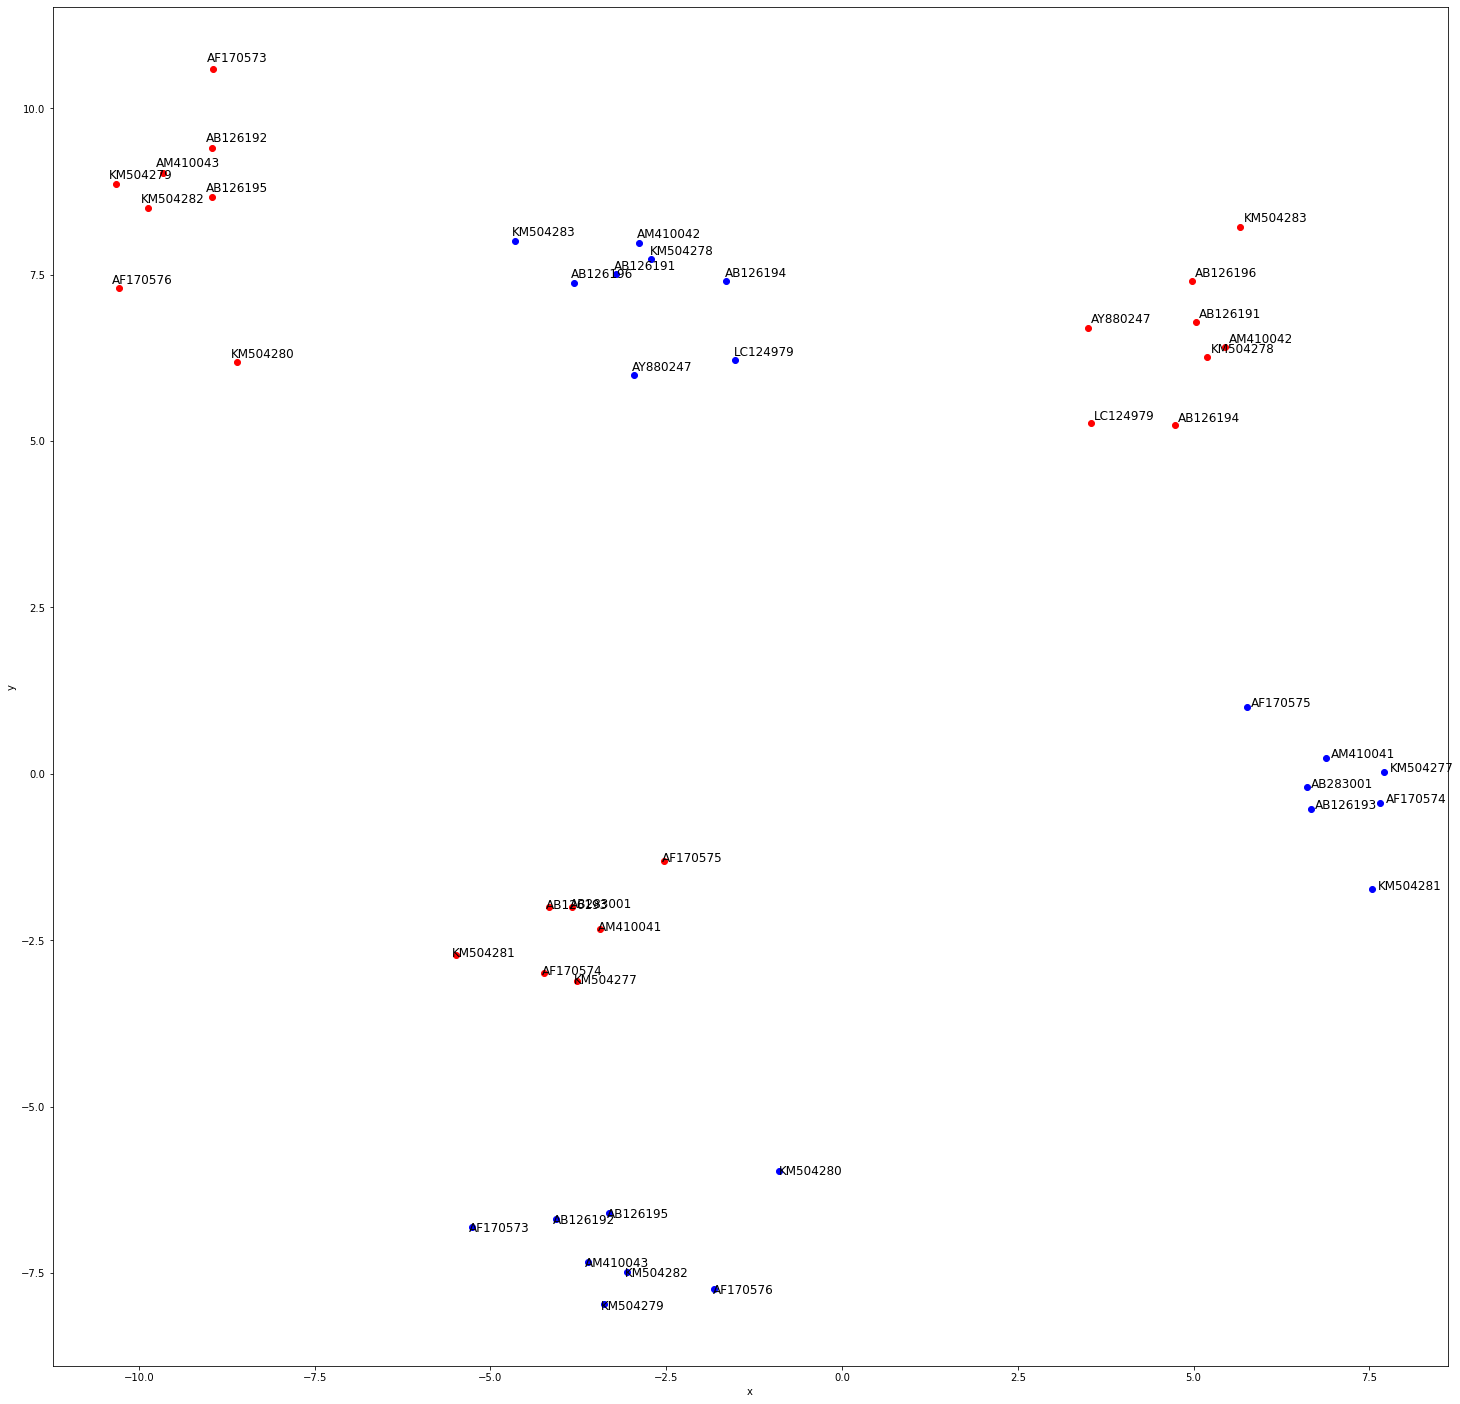

In [125]:
plt.figure(figsize=(25, 25))

for i in range(len(data)):
    x = data.iloc[i][0]
    y = data.iloc[i][1]
    name = data.iloc[i].name
    plt.plot(x, y, 'bo')
    plt.text(
        x * (1 + 0.01),
        y * (1 + 0.01),
        name,
        fontsize=12
    )

for i in range(len(data2)):
    x = data2.iloc[i][0]
    y = data2.iloc[i][1]
    name = data2.iloc[i].name
    plt.plot(x, y, 'bo', color='r')
    plt.text(
        x * (1 + 0.01),
        y * (1 + 0.01),
        name,
        fontsize=12
    )

plt.xlabel('x')
plt.ylabel('y')
plt.savefig('books_read.pdf')